# <center>CRIME ANALYSIS OF WOMEN IN INDIA

## <center> COMAPRISION OF ARIMA AND SARIMA (SARIMAX) MODEL

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings('ignore')

In [2]:
df  = pd.read_excel('crime.xlsx')

In [3]:
c=0
for i in range(len(df)):
    if df["STATE/UT"][i]=='All India':
        c=c+1
print("All India crimes : ",c)

All India crimes :  8


In [4]:
df.set_index("STATE/UT", inplace = True)

In [5]:
df=df.drop("All India")
df.tail()

,CRIME HEAD,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012
STATE/UT,,,,,,,,,,,,,
D&N Haveli,INDECENT REPRESENTATION OF WOMEN(PREVENTION)ACT,0,0,0,0,0,0,0,0,0,0,0,0
Daman & Diu,INDECENT REPRESENTATION OF WOMEN(PREVENTION)ACT,0,0,0,0,0,0,0,0,0,0,0,0
Delhi UT,INDECENT REPRESENTATION OF WOMEN(PREVENTION)ACT,1,0,0,0,1,1,0,0,0,0,1,0
Lakshadweep,INDECENT REPRESENTATION OF WOMEN(PREVENTION)ACT,0,0,0,0,0,0,0,0,0,1,0,0
Puducherry,INDECENT REPRESENTATION OF WOMEN(PREVENTION)ACT,0,0,0,0,0,0,0,0,0,0,0,0


In [6]:
crime=[]
head=df["CRIME HEAD"].unique()
#print("Crime heads",head)
k=0
for i in head:
    crime.append(i)
    print(k,i)
    k+=1
#print(crime)
cr=int(input("\nEnter crime name from given menu(0-7) : "))
print("\nSelected Crime : ",crime[cr])

0 RAPE
1 KIDNAPPING & ABDUCTION
2 DOWRY DEATH
3 ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY
4 INSULT TO THE MODESTY OF WOMEN
5 CRUELTY BY HUSBAND OR RELATIVES
6 IMMORAL TRAFFIC(PREVENTION)ACT
7 INDECENT REPRESENTATION OF WOMEN(PREVENTION)ACT

Enter crime name from given menu(0-7) : 2

Selected Crime :  DOWRY DEATH


In [7]:
cr1=[]
b=0
a=0
for z in range(2001,2013):
    for i in range(len(df)):
        if df["CRIME HEAD"][i]==crime[cr]:
            a=df[z][i]
            b+=a
    cr1.append(b)
    b=0
yr=[feat for feat in df]
yr.remove("CRIME HEAD")
print(f'List of Total " {crime[cr]} " case registered:\n')
print(yr)
print(cr1)

List of Total " DOWRY DEATH " case registered:

[2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012]
[6851, 6822, 6208, 7026, 6787, 7618, 8093, 8172, 8383, 8391, 8618, 8233]


In [8]:
yeardf =pd.DataFrame(yr)
crimedf =pd.DataFrame(cr1)

In [9]:
CrimeTable = pd.concat([yeardf,crimedf],axis=1)
CrimeTable.columns=["Year","Total Crime Recorded"]
CrimeTable

,Year,Total Crime Recorded
0,2001,6851
1,2002,6822
2,2003,6208
3,2004,7026
4,2005,6787
5,2006,7618
6,2007,8093
7,2008,8172
8,2009,8383
9,2010,8391


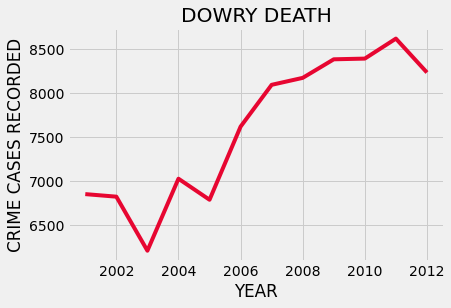

In [10]:
plt.style.use('fivethirtyeight')
plt.plot(yr, cr1, color='#e70631')
plt.xlabel('YEAR')
plt.ylabel('CRIME CASES RECORDED')
plt.title(crime[cr])
plt.show()

In [11]:
df=df.reset_index()

In [12]:
states=df["STATE/UT"].unique()

In [13]:
states=list(states)

In [14]:
stateG=df.groupby(["STATE/UT"])
states1 =pd.DataFrame(states)
states1

,0
0,Andhra Pradesh
1,Arunachal Pradesh
2,Assam
3,Bihar
4,Chhattisgarh
5,Goa
6,Gujarat
7,Haryana
8,Himachal Pradesh
9,Jammu & Kashmir


In [15]:
totalC=[]

year=int(input("Enter year: "))
s1=stateG.agg({year:"sum"})
for i in range(len(s1)):
        val=s1[year][i]
        totalC.append(val)

Enter year: 2009


In [16]:
totalC1 =pd.DataFrame(totalC)

In [17]:
tc = pd.concat([states1,totalC1],axis=1)

In [18]:
tc.columns=["States","Total Crime"]
tc

,States,Total Crime
0,Andhra Pradesh,92
1,Arunachal Pradesh,24207
2,Assam,164
3,Bihar,9680
4,Chhattisgarh,7520
5,Goa,150
6,Gujarat,3986
7,Haryana,19
8,Himachal Pradesh,13
9,Jammu & Kashmir,4245


In [19]:
tc=tc.set_index("States")

<AxesSubplot:title={'center':'TOTAL CRIME STATE-WISE'}, xlabel='States', ylabel='CRIME INCIDENTS'>

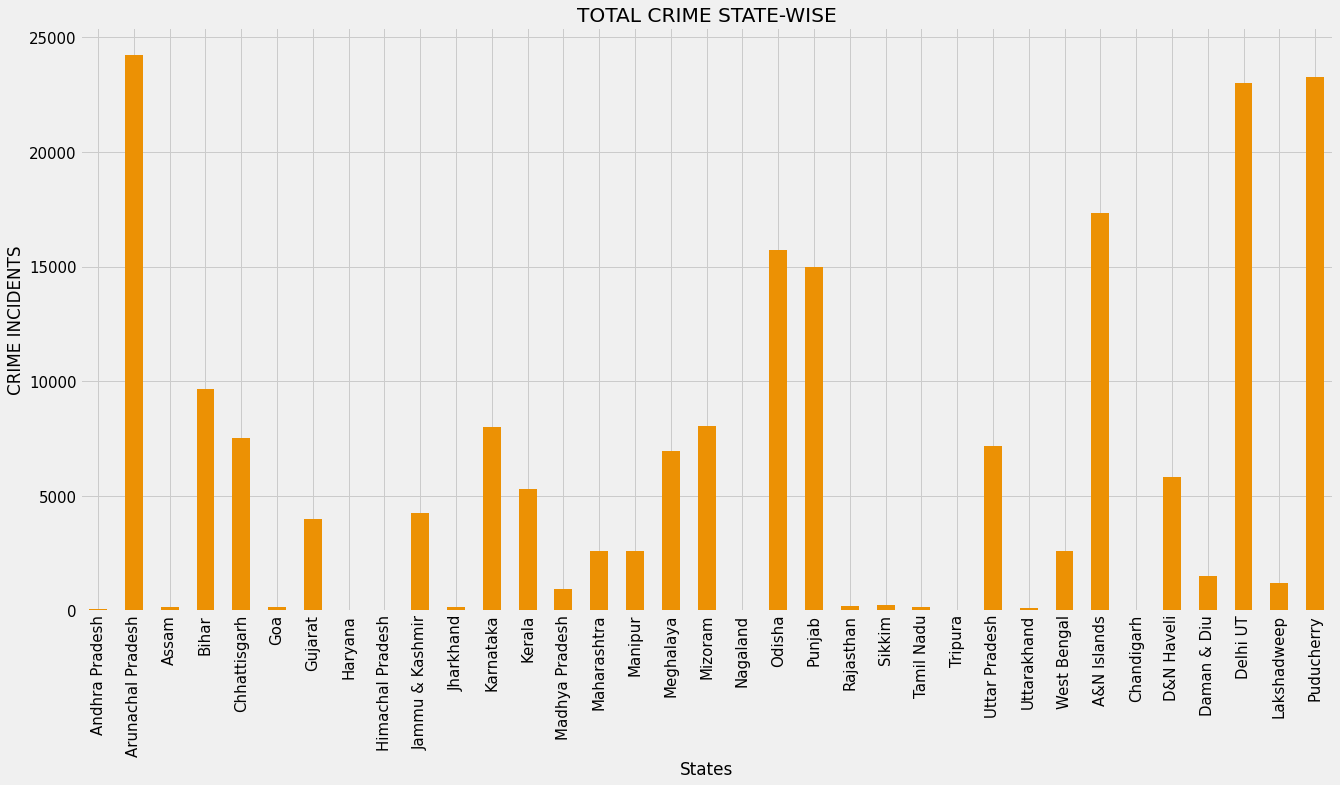

In [20]:
#Visualisation of TOTAL COMMITTED CRIME STATE-WISE
plt.style.use('fivethirtyeight')
plt.title('TOTAL CRIME STATE-WISE')
plt.xlabel('STATE')
plt.ylabel('CRIME INCIDENTS')
tc["Total Crime"].plot(kind='bar',figsize=(20,10),fontsize=15, color='#ec9104')

In [21]:
#Analysis of increase in crime from 2001 to 2012
#CRH=['ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY',
 #'CRUELTY BY HUSBAND OR RELATIVES',
 #'DOWRY DEATH',
 #'IMMORAL TRAFFIC(PREVENTION)ACT',
 #'INDECENT REPRESENTATION OF WOMEN(PREVENTION)ACT',
 #'INSULT TO THE MODESTY OF WOMEN',
 #'KIDNAPPING & ABDUCTION',
 #'RAPE']
#Cgroup=df.groupby("CRIME HEAD")
#Cgroup.sum()
crime=list(crime)
crime

['RAPE',
 'KIDNAPPING & ABDUCTION',
 'DOWRY DEATH',
 'ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY',
 'INSULT TO THE MODESTY OF WOMEN',
 'CRUELTY BY HUSBAND OR RELATIVES',
 'IMMORAL TRAFFIC(PREVENTION)ACT',
 'INDECENT REPRESENTATION OF WOMEN(PREVENTION)ACT']

In [22]:
Cgroup=df.groupby("CRIME HEAD")
Cgroup.sum()

,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012
CRIME HEAD,,,,,,,,,,,,
ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,34124,33943,32939,34567,34175,36617,38734,40413,38711,40613,42968,45351
CRUELTY BY HUSBAND OR RELATIVES,49170,49237,50703,58121,58319,63128,75930,81344,89546,94041,99135,106527
DOWRY DEATH,6851,6822,6208,7026,6787,7618,8093,8172,8383,8391,8618,8233
IMMORAL TRAFFIC(PREVENTION)ACT,8796,6598,5510,5748,5908,4541,3568,2660,2474,2499,2436,2563
INDECENT REPRESENTATION OF WOMEN(PREVENTION)ACT,1052,2508,1043,1378,2917,1562,1200,1025,845,895,453,141
INSULT TO THE MODESTY OF WOMEN,9746,10155,12325,10001,9984,9966,10950,12214,11009,9961,8570,9173
KIDNAPPING & ABDUCTION,14645,14506,13296,15578,15750,17414,20416,22939,25741,29795,35565,38262
RAPE,16075,16373,15847,18233,18359,19348,20737,21467,21397,22172,24206,24923


In [23]:
Cgroup1=Cgroup.agg({2001:'sum',2012:'sum'})
Cgroup1

,2001,2012
CRIME HEAD,,
ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,34124,45351
CRUELTY BY HUSBAND OR RELATIVES,49170,106527
DOWRY DEATH,6851,8233
IMMORAL TRAFFIC(PREVENTION)ACT,8796,2563
INDECENT REPRESENTATION OF WOMEN(PREVENTION)ACT,1052,141
INSULT TO THE MODESTY OF WOMEN,9746,9173
KIDNAPPING & ABDUCTION,14645,38262
RAPE,16075,24923


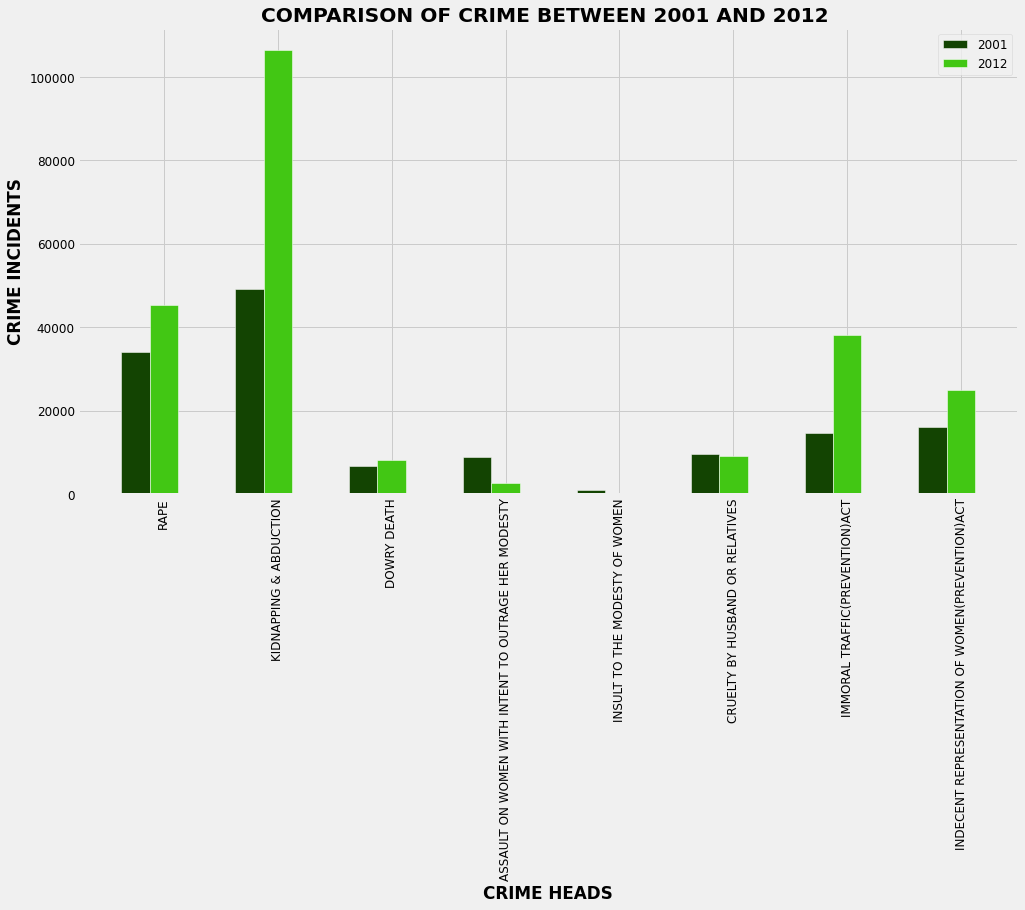

In [24]:
#Visualization of graph comparing crimes in years 2001 and 2012
plt.style.use('fivethirtyeight')
# set width of bar
barWidth = 0.25
 
# set height of bar
bars1 = []
bars2 = []
for i in range(len(Cgroup1)):
        bars1.append(Cgroup1[2001][i])
for i in range(len(Cgroup1)):
        bars2.append(Cgroup1[2012][i])
        
        
plt.figure(figsize=(15,8),)

# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]

plt.title('COMPARISON OF CRIME BETWEEN 2001 AND 2012 ',fontweight='bold')

# Make the plot
plt.bar(r1, bars1, color='#134402', width=barWidth, edgecolor='white', label='2001')
plt.bar(r2, bars2, color='#42c714', width=barWidth, edgecolor='white', label='2012')


plt.ylabel('CRIME INCIDENTS',fontweight='bold')
plt.yticks(fontsize=12)
# Add xticks on the middle of the group bars
plt.xlabel('CRIME HEADS', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(bars1))],crime ,rotation="vertical",fontsize=12)


# Create legend & Show graphic
plt.legend(fontsize=12)
plt.show()

In [25]:
df2  = pd.read_excel('crime.xlsx',sheet_name="Sheet2")
df2.head()

,STATE/UT,DISTRICT,Year,Rape,Kidnapping and Abduction,Dowry Deaths,Assault on women with intent to outrage her modesty,Insult to modesty of Women,Cruelty by Husband or his Relatives,Importation of Girls
0,ANDHRA PRADESH,ADILABAD,2001,50,30,16,149,34,175,0
1,ANDHRA PRADESH,ANANTAPUR,2001,23,30,7,118,24,154,0
2,ANDHRA PRADESH,CHITTOOR,2001,27,34,14,112,83,186,0
3,ANDHRA PRADESH,CUDDAPAH,2001,20,20,17,126,38,57,0
4,ANDHRA PRADESH,EAST GODAVARI,2001,23,26,12,109,58,247,0


In [26]:
#Analysis of Crime cases in a specified state and year
#Cr=["Assault on women with intent to outrage her modesty","Cruelty by Husband or his Relatives","Dowry Deaths","Importation of Girls","Insult to modesty of Women","Kidnapping and Abduction","Rape"]
crime

['RAPE',
 'KIDNAPPING & ABDUCTION',
 'DOWRY DEATH',
 'ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY',
 'INSULT TO THE MODESTY OF WOMEN',
 'CRUELTY BY HUSBAND OR RELATIVES',
 'IMMORAL TRAFFIC(PREVENTION)ACT',
 'INDECENT REPRESENTATION OF WOMEN(PREVENTION)ACT']

In [27]:
states=df2["STATE/UT"].unique()
states

array(['ANDHRA PRADESH', 'ARUNACHAL PRADESH', 'ASSAM', 'BIHAR',
       'CHHATTISGARH', 'GOA', 'GUJARAT', 'HARYANA', 'HIMACHAL PRADESH',
       'JAMMU & KASHMIR', 'JHARKHAND', 'KARNATAKA', 'KERALA',
       'MADHYA PRADESH', 'MAHARASHTRA', 'MANIPUR', 'MEGHALAYA', 'MIZORAM',
       'NAGALAND', 'ODISHA', 'PUNJAB', 'RAJASTHAN', 'SIKKIM',
       'TAMIL NADU', 'TRIPURA', 'UTTAR PRADESH', 'UTTARAKHAND',
       'WEST BENGAL', 'A & N ISLANDS', 'CHANDIGARH', 'D & N HAVELI',
       'DAMAN & DIU', 'DELHI', 'LAKSHADWEEP', 'PUDUCHERRY'], dtype=object)

In [28]:
Cr1=pd.DataFrame(crime)
Cr1

,0
0,RAPE
1,KIDNAPPING & ABDUCTION
2,DOWRY DEATH
3,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MO...
4,INSULT TO THE MODESTY OF WOMEN
5,CRUELTY BY HUSBAND OR RELATIVES
6,IMMORAL TRAFFIC(PREVENTION)ACT
7,INDECENT REPRESENTATION OF WOMEN(PREVENTION)ACT


In [29]:
states=list(states)
#The input of the state name and year is taken from the user
k=0
for i in states:
    print(f'{k}.',i)
    k+=1
s=int(input("Enter State/UT no. as indicated in the list: "))
print(states[s])
year=int(input("Enter year: "))
print("Year:",year)

0. ANDHRA PRADESH
1. ARUNACHAL PRADESH
2. ASSAM
3. BIHAR
4. CHHATTISGARH
5. GOA
6. GUJARAT
7. HARYANA
8. HIMACHAL PRADESH
9. JAMMU & KASHMIR
10. JHARKHAND
11. KARNATAKA
12. KERALA
13. MADHYA PRADESH
14. MAHARASHTRA
15. MANIPUR
16. MEGHALAYA
17. MIZORAM
18. NAGALAND
19. ODISHA
20. PUNJAB
21. RAJASTHAN
22. SIKKIM
23. TAMIL NADU
24. TRIPURA
25. UTTAR PRADESH
26. UTTARAKHAND
27. WEST BENGAL
28. A & N ISLANDS
29. CHANDIGARH
30. D & N HAVELI
31. DAMAN & DIU
32. DELHI
33. LAKSHADWEEP
34. PUDUCHERRY
Enter State/UT no. as indicated in the list: 23
TAMIL NADU
Enter year: 2009
Year: 2009


In [30]:
mask1=df2['STATE/UT']==states[s]
mask2=df2['Year']==year
dd=df2[mask1 & mask2]
dd.head(5)

,STATE/UT,DISTRICT,Year,Rape,Kidnapping and Abduction,Dowry Deaths,Assault on women with intent to outrage her modesty,Insult to modesty of Women,Cruelty by Husband or his Relatives,Importation of Girls
6445,TAMIL NADU,ARIYALUR,2009,21,15,3,39,1,7,0
6446,TAMIL NADU,CHENNAI,2009,39,37,19,42,10,154,0
6447,TAMIL NADU,CHENNAI RLY.,2009,0,0,2,5,1,0,0
6448,TAMIL NADU,CHENNAISUBURBAN,2009,46,18,20,51,65,59,0
6449,TAMIL NADU,COIMBATORE RURAL,2009,7,24,4,41,12,56,0


In [31]:
dd=dd.set_index('DISTRICT')
dd=dd.drop("TOTAL")
dd=dd.reset_index('DISTRICT')
dd

,DISTRICT,STATE/UT,Year,Rape,Kidnapping and Abduction,Dowry Deaths,Assault on women with intent to outrage her modesty,Insult to modesty of Women,Cruelty by Husband or his Relatives,Importation of Girls
0,ARIYALUR,TAMIL NADU,2009,21,15,3,39,1,7,0
1,CHENNAI,TAMIL NADU,2009,39,37,19,42,10,154,0
2,CHENNAI RLY.,TAMIL NADU,2009,0,0,2,5,1,0,0
3,CHENNAISUBURBAN,TAMIL NADU,2009,46,18,20,51,65,59,0
4,COIMBATORE RURAL,TAMIL NADU,2009,7,24,4,41,12,56,0
5,COIMBATORE URBAN,TAMIL NADU,2009,9,9,4,21,3,48,0
6,CUDDALORE,TAMIL NADU,2009,20,34,13,32,0,39,0
7,DHARMAPURI,TAMIL NADU,2009,7,30,6,56,5,34,0
8,DINDIGUL,TAMIL NADU,2009,10,61,1,34,1,87,0
9,ERODE,TAMIL NADU,2009,16,37,1,31,9,12,0


In [32]:
#SUM of all crimes
dd=dd.agg({"Assault on women with intent to outrage her modesty":"sum","Cruelty by Husband or his Relatives":"sum","Dowry Deaths":"sum","Importation of Girls":"sum","Insult to modesty of Women":"sum","Kidnapping and Abduction":"sum","Rape":"sum"})
dd

Assault on women with intent to outrage her modesty    1242
Cruelty by Husband or his Relatives                    1460
Dowry Deaths                                            194
Importation of Girls                                      0
Insult to modesty of Women                              501
Kidnapping and Abduction                               1133
Rape                                                    596
dtype: int64

In [33]:
dd=list(dd)
dd1=pd.Series(dd)
dd1=pd.DataFrame(dd1)
#dd1
DaTa = pd.concat([Cr1,dd1],axis=1)
#DaTa

In [34]:
DaTa.columns=["Crime Heads","Total Crime"]
DaTa=DaTa.set_index("Crime Heads")

In [35]:
#Analysis of crime in a given state and year District-wise
StatesList=df2["STATE/UT"].unique()
StatesList=list(StatesList)

In [36]:
#The state name in taken as an input from the user
k=0
for i in StatesList:
    print(f'{k}.',i)
    k+=1
s=int(input("Enter State/UT no. as indicated in the list: "))
print(StatesList[s])

0. ANDHRA PRADESH
1. ARUNACHAL PRADESH
2. ASSAM
3. BIHAR
4. CHHATTISGARH
5. GOA
6. GUJARAT
7. HARYANA
8. HIMACHAL PRADESH
9. JAMMU & KASHMIR
10. JHARKHAND
11. KARNATAKA
12. KERALA
13. MADHYA PRADESH
14. MAHARASHTRA
15. MANIPUR
16. MEGHALAYA
17. MIZORAM
18. NAGALAND
19. ODISHA
20. PUNJAB
21. RAJASTHAN
22. SIKKIM
23. TAMIL NADU
24. TRIPURA
25. UTTAR PRADESH
26. UTTARAKHAND
27. WEST BENGAL
28. A & N ISLANDS
29. CHANDIGARH
30. D & N HAVELI
31. DAMAN & DIU
32. DELHI
33. LAKSHADWEEP
34. PUDUCHERRY
Enter State/UT no. as indicated in the list: 23
TAMIL NADU


In [37]:
somedata=df2['STATE/UT']==states[s]
somedata=df2[somedata]
somedata.head(6)

,STATE/UT,DISTRICT,Year,Rape,Kidnapping and Abduction,Dowry Deaths,Assault on women with intent to outrage her modesty,Insult to modesty of Women,Cruelty by Husband or his Relatives,Importation of Girls
535,TAMIL NADU,ARIYALUR,2001,6,14,3,38,4,8,0
536,TAMIL NADU,CHENGAI,2001,20,8,16,58,8,57,0
537,TAMIL NADU,CHENNAI,2001,28,0,13,70,209,111,0
538,TAMIL NADU,CHENNAI RLY.,2001,0,0,0,5,0,2,0
539,TAMIL NADU,COIMBATORE RURAL,2001,18,27,16,75,25,49,0
540,TAMIL NADU,COIMBATORE URBAN,2001,4,10,5,19,38,28,0


In [38]:
data=somedata.groupby('DISTRICT')
#data

In [39]:
data1=data.agg({"Assault on women with intent to outrage her modesty":"sum",
                "Cruelty by Husband or his Relatives":"sum",
                "Dowry Deaths":"sum",
                "Importation of Girls":"sum",
                "Insult to modesty of Women":"sum",
                "Kidnapping and Abduction":"sum","Rape":"sum"})
data1

,Assault on women with intent to outrage her modesty,Cruelty by Husband or his Relatives,Dowry Deaths,Importation of Girls,Insult to modesty of Women,Kidnapping and Abduction,Rape
DISTRICT,,,,,,,
ARIYALUR,241,53,9,0,12,109,74
CHENGAI,329,319,91,0,123,95,97
CHENNAI,849,2212,271,0,2229,377,531
CHENNAI RLY.,42,8,7,0,14,6,1
CHENNAISUBURBAN,154,157,66,0,194,58,96
COIMBATORE RURAL,912,973,103,0,219,389,197
COIMBATORE URBAN,245,570,42,0,117,81,100
CUDDALORE,619,470,105,0,408,534,294
DHARMAPURI,753,466,66,0,66,433,177


In [40]:
data2=data1.drop('TOTAL')
data2

,Assault on women with intent to outrage her modesty,Cruelty by Husband or his Relatives,Dowry Deaths,Importation of Girls,Insult to modesty of Women,Kidnapping and Abduction,Rape
DISTRICT,,,,,,,
ARIYALUR,241,53,9,0,12,109,74
CHENGAI,329,319,91,0,123,95,97
CHENNAI,849,2212,271,0,2229,377,531
CHENNAI RLY.,42,8,7,0,14,6,1
CHENNAISUBURBAN,154,157,66,0,194,58,96
COIMBATORE RURAL,912,973,103,0,219,389,197
COIMBATORE URBAN,245,570,42,0,117,81,100
CUDDALORE,619,470,105,0,408,534,294
DHARMAPURI,753,466,66,0,66,433,177


In [41]:
indx=data2.index
#indx

In [42]:
indx=list(indx)
#indx

In [43]:
indx_df=pd.DataFrame(indx)
#indx_df

In [44]:
CrimeHead=["Assault on women with intent to outrage her modesty","Cruelty by Husband or his Relatives","Dowry Deaths","Importation of Girls","Insult to modesty of Women","Kidnapping and Abduction","Rape"]
#CrimeHead

In [45]:
#The Crime Head input is taken from the user
Crime=[]
k=0
for i in CrimeHead:
    Crime.append(i)
    print(f'{k}.',i)
    k+=1
#print(Crime)
c=int(input("Enter crime name from given menu: "))
print(Crime[c])

0. Assault on women with intent to outrage her modesty
1. Cruelty by Husband or his Relatives
2. Dowry Deaths
3. Importation of Girls
4. Insult to modesty of Women
5. Kidnapping and Abduction
6. Rape
Enter crime name from given menu: 2
Dowry Deaths


In [46]:
CrimeCases=[]
for i in range(len(data2)):
    CrimeCases.append(data2[Crime[c]][i])

In [47]:
CrimeCases_df=pd.DataFrame(CrimeCases)
#CrimeCases_df

In [48]:
DataTable = pd.concat([indx_df,CrimeCases_df],axis=1)
DataTable.columns=["Districts","Crime Cases"]
DataTable=DataTable.set_index("Districts")
#DataTable

In [49]:
#Webscrapping to fetch hex color codes from a website
import bs4
import requests
colorp=[]
c=0
url="http://www.color-hex.com/"
data=requests.get(url)
soup1=bs4.BeautifulSoup(data.text,"html.parser")
for z in soup1.find_all("a"):
    a1=str(z.get("title"))
    if a1[:1]=="#":
        #print(a1[:7])
        colorp.append(a1[:7])
        c=c+1
print(c)

42


In [50]:
colorp1=colorp[:34]
len(colorp1)

34

<AxesSubplot:title={'center':'TAMIL NADU'}, xlabel='Districts', ylabel='CRIME INCIDENTS'>

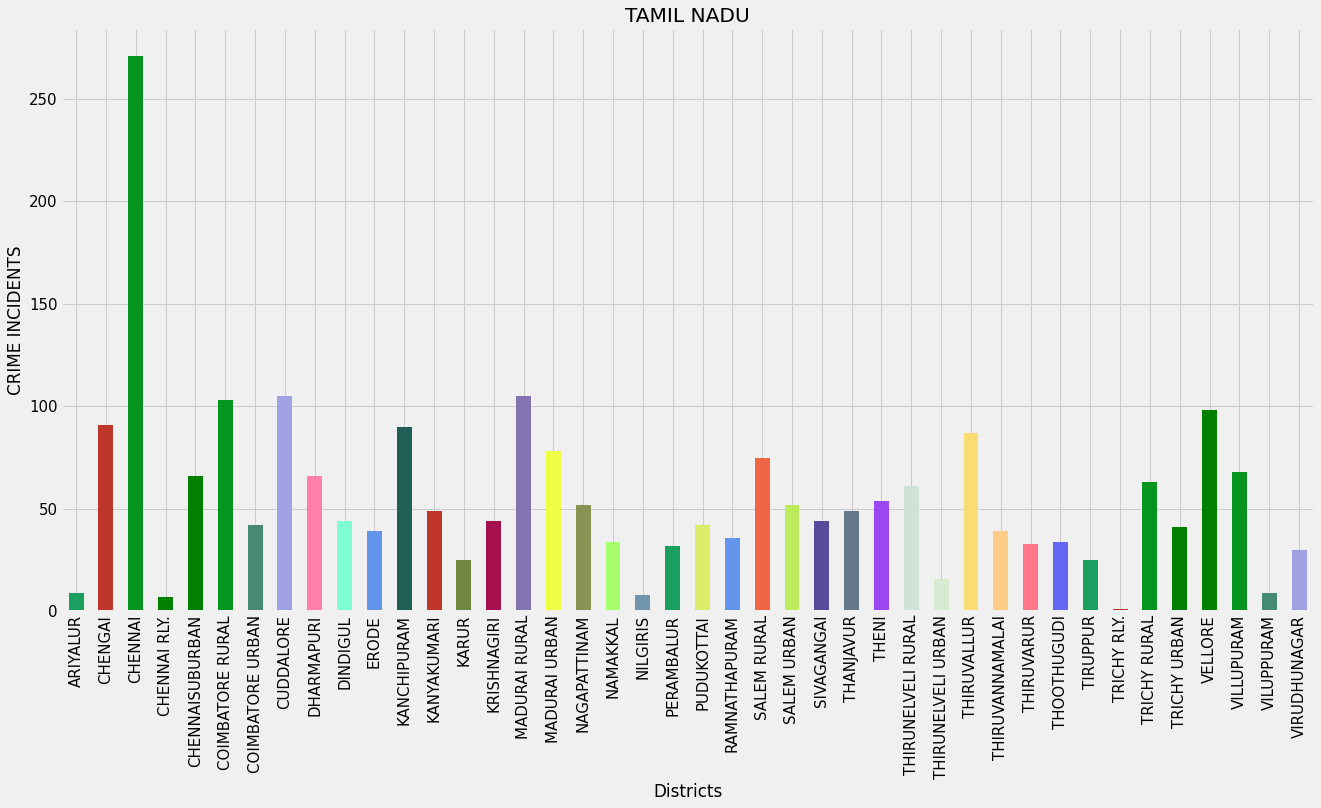

In [51]:
#Visualization of graph on CRIME CASES DISTRICT-WISE
plt.style.use('fivethirtyeight')
plt.title(StatesList[s])
plt.xlabel('DISTRICTS')
plt.ylabel('CRIME INCIDENTS')
DataTable["Crime Cases"].plot(kind='bar',color=colorp1,fontsize=15,legend=False,figsize=(20,10))

In [52]:
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA

In [53]:
from statsmodels.tsa.arima.model import ARIMA
names = ['2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008'
         , '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016','2017','2018','2019','2020','2021','2022']
def state_case(state, case):
    for i in range(0, len(df)):
        if df.iloc[i,0] == state and df.iloc[i,1]==case:
            temp = df.iloc[i, 2:]
            train = np.array(temp)
            train = train.astype(np.int64)
            train = np.reshape(train, (-1, 1))
            
    temp = pd.DataFrame(train)
    sm.graphics.tsa.plot_acf(temp.values.squeeze())
    sm.graphics.tsa.plot_pacf(temp.values.squeeze(),lags=5)
    model = ARIMA(train, order=(1,1,1))
    model_fit = model.fit()
    pred = model_fit.predict(start=13, end=22)
    new_data = np.append(train, pred)
    plt.figure(figsize=(16,5))
    plt.bar(names, new_data)
    year = [2013, 2014, 2015, 2016,2017,2018,2019,2020,2021,2022]
    for w in range(0, 10):
        print(year[w]," " ,pred[w].round(0))
    return pred

Enter the state:
Tamil Nadu
Enter the crime
DOWRY DEATH
2013   111.0
2014   111.0
2015   112.0
2016   112.0
2017   113.0
2018   113.0
2019   113.0
2020   114.0
2021   114.0
2022   115.0


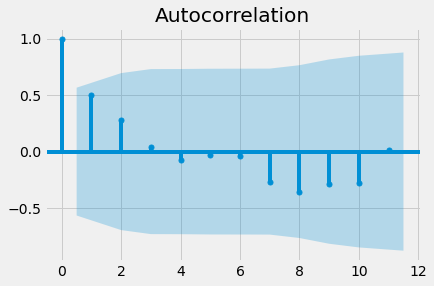

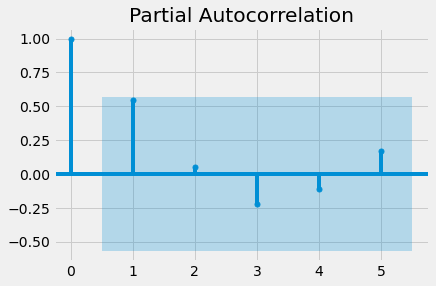

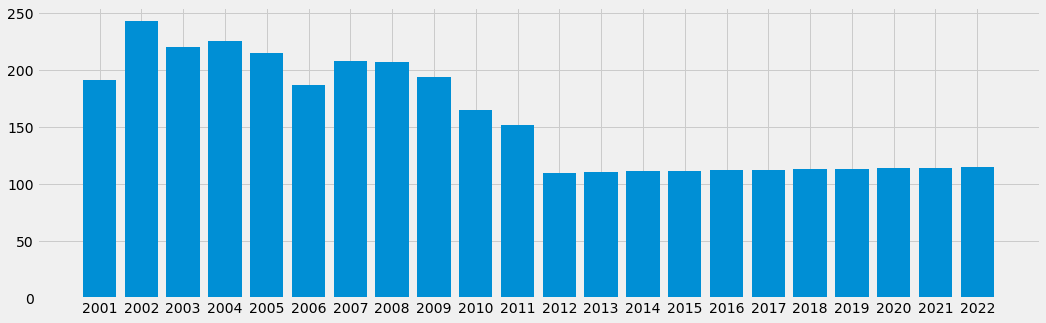

In [54]:
print("Enter the state:")
s=input()
print("Enter the crime")
c=input()
pred = state_case(s, c)

In [57]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
names = ['2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008'
         , '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016','2017','2018','2019','2020','2021','2022']
def state_case(state, case):
    for i in range(0, len(df)):
        if df.iloc[i,0] == state and df.iloc[i,1]==case:
            temp = df.iloc[i, 2:]
            train = np.array(temp)
            train = train.astype(np.int64)
            train = np.reshape(train, (-1, 1))

    temp = pd.DataFrame(train)
    sm.graphics.tsa.plot_acf(temp.values.squeeze(),lags=10)
    sm.graphics.tsa.plot_pacf(temp.values.squeeze(),lags=5)
    model = SARIMAX(train, order=(12,1,1))
    model_fit = model.fit()
    pred = model_fit.predict(start=13, end=22)
    model_fit.summary()
    new_data = np.append(train, pred)
    plt.figure(figsize=(16,5))
    plt.bar(names, new_data)
    year = [2013, 2014, 2015, 2016,2017,2018,2019,2020,2021,2022]
    for w in range(0, 10):
        print(year[w]," " ,pred[w].round(0))
    return pred

Enter the state:
Tamil Nadu
Enter the crime
DOWRY DEATH
2013   147.0
2014   131.0
2015   156.0
2016   133.0
2017   134.0
2018   160.0
2019   194.0
2020   207.0
2021   225.0
2022   223.0


C:\Users\gokul\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


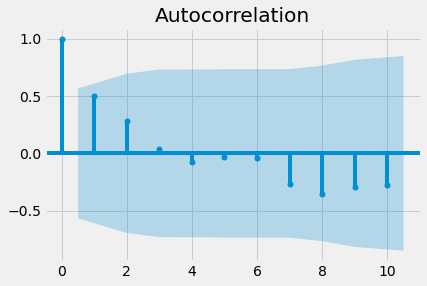

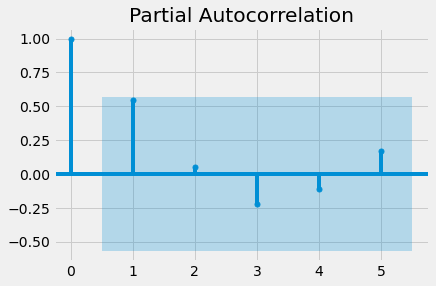

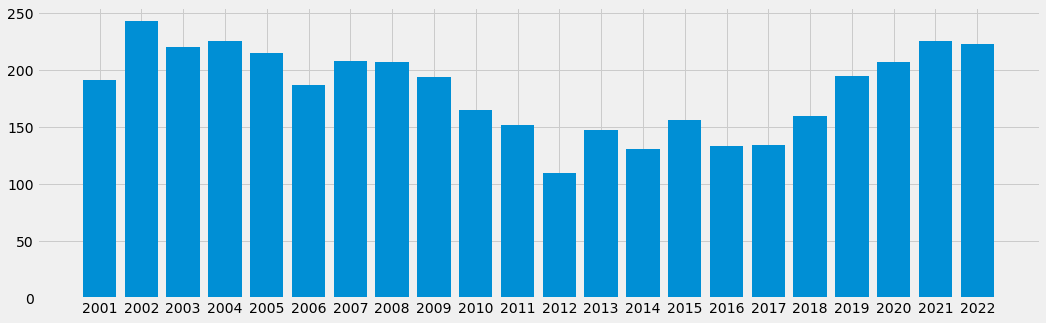

In [58]:
print("Enter the state:")
s=input()
print("Enter the crime")
c=input()
pred = state_case(s, c)